# Essential Math for Data Science

## 5. Linear Regression

### A Basic Linear Regression

m = [1.93939394]
b = [4.73333333]


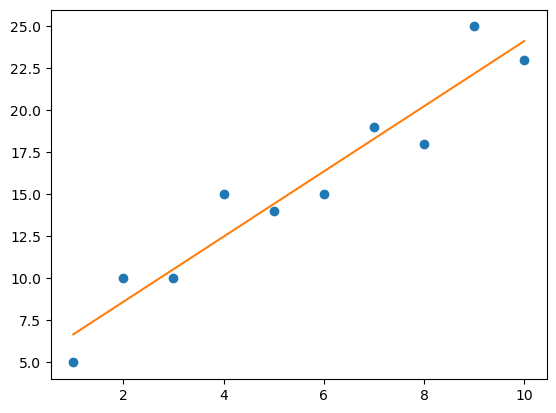

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import data
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',')

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(X, Y)

m = fit.coef_.flatten()
b = fit.intercept_.flatten()

print(f'm = {m}')
print(f'b = {b}')

# Show in chart
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, m*X+b)  # line
plt.show()

m = [1.7867224]
b = [-16.51923513]


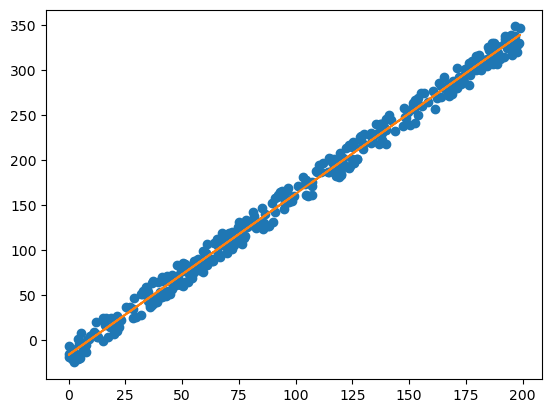

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import data
df = pd.read_csv('https://bit.ly/3cIH97A', delimiter = ',')

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(X, Y)

m = fit.coef_.flatten()
b = fit.intercept_.flatten()

print(f'm = {m}')
print(f'b = {b}')

# Show in chart
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, m*X+b)  # line
plt.show()

### Residuals and Squared Errors

In [26]:
import pandas as pd

# Import data
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',').itertuples()

# Test with a given line
m = 1.93939
b = 4.73333

# Calculate the residuals
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual = y_actual - y_predict
    print(residual)

-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973


In [27]:
import pandas as pd

# Create a DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22]}

df = pd.DataFrame(data)

# Use itertuples to iterate over the rows
for row in df.itertuples():
    print(f"Name: {row.Name}, Age: {row.Age}")

Name: Alice, Age: 25
Name: Bob, Age: 30
Name: Charlie, Age: 22


In [55]:
import pandas as pd

# Import data
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',').itertuples()

# Test with a given line
m = 1.93939
b = 4.73333
sum_of_squares = 0

# Calculate sum of squares
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual_squared = (y_actual - y_predict) ** 2
    sum_of_squares += residual_squared

print(sum_of_squares)

28.096969704500005


### Finding the Best Fit Line
### Closed Form Equation

In [68]:
import pandas as pd

points = list(pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',').itertuples())

n = len(points) # n = 10

m = (n*sum(p.x*p.y for p in points) - sum(p.x for p in points) * 
     sum(p.y for p in points)) / (n*sum(p.x**2 for p in points) - 
     sum(p.x for p in points)**2)

b = (sum(p.y for p in points) / n) - m * sum(p.x for p in points) / n

print(m, b)

1.9393939393939394 4.7333333333333325


### Inverse Matrix Techniques

In [90]:
import pandas as pd
from numpy.linalg import inv
import numpy as np

# Import data
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',')

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()

# Add placeholder '1' column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).T

# Extract output coolumn (all rows, last column)
Y = df.values[:, -1]

# Calculate coefficiens for slope and intercept
b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)
print(b)

# Predict against the y-values
y_predict = X_1.dot(b)
print(y_predict)

[1.93939394 4.73333333]
[ 6.67272727  8.61212121 10.55151515 12.49090909 14.43030303 16.36969697
 18.30909091 20.24848485 22.18787879 24.12727273]


In [88]:
X_1.transpose()

array([[2., 1.],
       [3., 1.],
       [1., 1.],
       [4., 1.]])

In [84]:
import numpy as np

# Create a 2D NumPy array
arr_2d = np.array([[1, 2, 3],
                   [4, 5, 6]])

# Flatten the 2D array into a 1D array
arr_flat = arr_2d.flatten()

print(arr_2d)
print('\n')
print(arr_flat)

[[1 2 3]
 [4 5 6]]


[1 2 3 4 5 6]


In [87]:
import numpy as np

# Sample input variables (1D array)
X = np.array([2.0, 3.0, 1.0, 4.0])

# Create a placeholder bias term array
bias = np.ones(len(X))

# Stack the input variables and bias term vertically
X_1 = np.vstack([X, bias])
X_2 = np.vstack([X, bias]).T


print(X)
print('\n')
print(X_1)
print('\n')
print(X_2)

[2. 3. 1. 4.]


[[2. 3. 1. 4.]
 [1. 1. 1. 1.]]


[[2. 1.]
 [3. 1.]
 [1. 1.]
 [4. 1.]]
